In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#把时间字符串转为时间类型设置为索引
df = pd.read_csv("D:/study/ml/数据分析资料/数据分析资料/day06/code/PM2.5/BeijingPM20100101_20151231.csv")
print(df.head(1))
print(df.info())

   No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   

   PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd   Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW  1.79   

   precipitation  Iprec  
0            0.0    0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               52584 non-null  int64  
 1   year             52584 non-null  int64  
 2   month            52584 non-null  int64  
 3   day              52584 non-null  int64  
 4   hour             52584 non-null  int64  
 5   season           52584 non-null  int64  
 6   PM_Dongsi        25052 non-null  float64
 7   PM_Dongsihuan    20508 non-null  float64
 8   PM_Nongzhanguan  24931 non-null  float64
 9   PM_US Post       50387 non-null  float64
 10  DEWP

PeriodIndex(['2010-01-04 11:00', '2010-01-11 11:00', '2010-01-18 11:00',
             '2010-01-25 11:00', '2010-01-14 11:00', '2010-02-08 11:00',
             '2010-02-15 11:00', '2010-02-22 11:00', '2010-02-13 11:00',
             '2010-03-08 11:00',
             ...
             '2015-10-26 11:00', '2015-10-10 11:00', '2015-11-09 11:00',
             '2015-11-16 11:00', '2015-11-23 11:00', '2015-11-17 11:00',
             '2015-12-07 11:00', '2015-12-14 11:00', '2015-12-21 11:00',
             '2015-12-28 11:00'],
            dtype='period[H]', length=313, freq='H')
                No    year     month        day  hour    season  PM_Dongsi  \
datetime                                                                     
2010-01-01    84.5  2010.0  1.000000   4.000000  11.5  4.000000        NaN   
2010-01-08   252.5  2010.0  1.000000  11.000000  11.5  4.000000        NaN   
2010-01-15   420.5  2010.0  1.000000  18.000000  11.5  4.000000        NaN   
2010-01-22   588.5  2010.0  1.00000

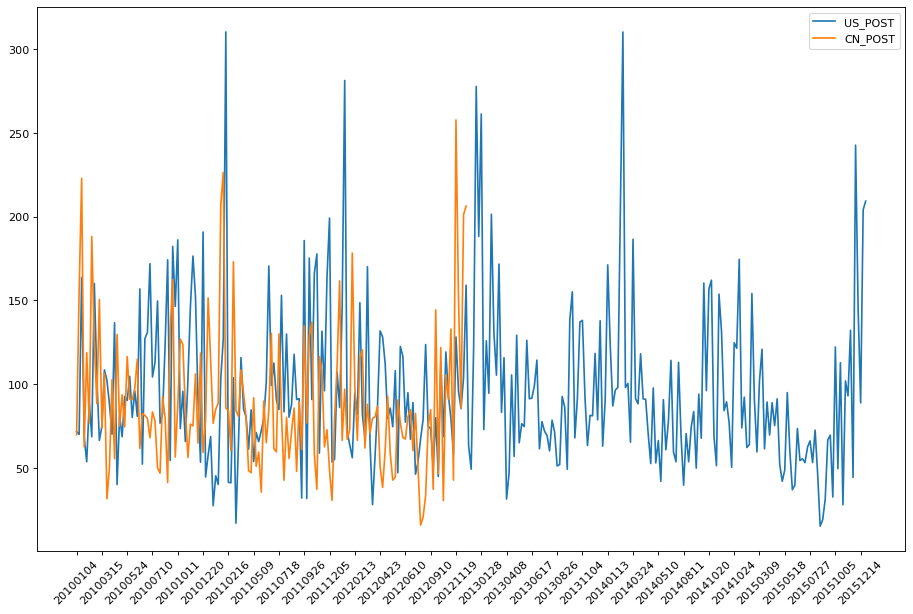

In [6]:
period=pd.PeriodIndex(year=df["year"],month=df["month"],day=df["day"],hour=df["hour"],freq="H")
print(period)
df["datetime"]=period
print(df.head(10))
#吧datetime设置为索引
df.set_index("datetime",inplace=True)
#进行降采样
df.resample("7D").mean()
#处理缺失数据,删除
data=df["PM_US Post"].dropna()
data_china=df["PM_Dongsi"].dropna()
#画图
_x=data.index
_x=[i.strftime("%Y%m%d") for i in _x]
_x2=[i.strftime("%Y%m%d") for i in data_china.index]
_y=data.values
_y2=data_china.values
plt.figure(figsize=(14,9),dpi=80)
plt.plot(range(len(_x)),_y,label="US_POST")
plt.plot(range(len(_x2)),_y2,label="CN_POST")
plt.xticks(range(0,len(_x),10),list(_x)[::10],rotation=45)
plt.legend(loc="best")
plt.show()